In [2]:
pip install keras

     ---------------------------------------- 1.7/1.7 MB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install tensorflow

  Using cached tensorflow-2.12.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp39-cp39-win_amd64.whl (272.8 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached grpcio-1.54.0-cp39-cp39-win_amd64.whl (4.1 MB)
  Using cached jax-0.4.8-py3-none-any.whl
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorboard-2.12.2-py3-none-any.whl (5.6 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached ml_dtypes-0.1.0-cp39-cp39-win_amd64.whl (120 kB)
  Using cached google_auth-2.17.3-py2.py3-none-any.whl (178 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached cachetools-5.3.0-py3-none-any.whl (9.3 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
from keras.datasets import mnist

In [2]:
(train_x,train_y),(test_x,test_y)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [8]:
train_x=train_x/255
test_x=test_x/255

In [10]:
train_x.shape

(60000, 28, 28)

In [15]:
import matplotlib.pyplot as plt
import numpy as np

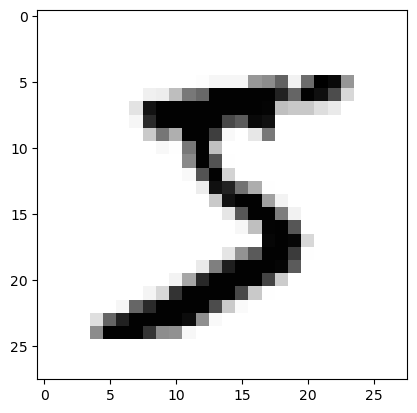

In [16]:
plt.imshow(train_x[0],cmap='Greys')

In [18]:
from tensorflow.keras import layers

In [20]:
model_lr = tf.keras.models.Sequential([
        layers.Input(train_x.shape[1:]),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ])
model_lr.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [23]:
y_onehot_train = tf.one_hot(train_y, 10)
model_lr.fit(train_x, y_onehot_train)

1875/1875 [==============================] - 5s 1ms/step - loss: 0.4693 - accuracy: 0.8766


In [25]:
model_lr = tf.keras.models.Sequential([
        layers.Input(train_x.shape[1:]),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ])
model_lr.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_lr.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [26]:
# model_lr.fit(x_train, y_train)
history_lr = model_lr.fit(train_x, train_y, epochs=10, batch_size=128, validation_data=(test_x, test_y), verbose=False)

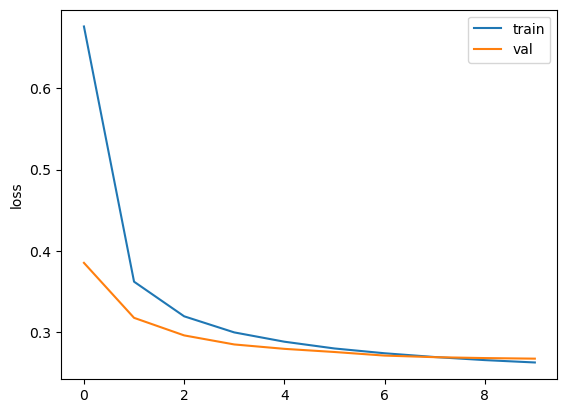

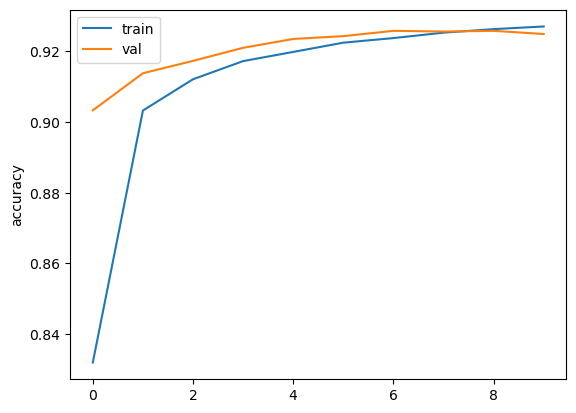

In [28]:
plt.plot(history_lr.history['loss'], label='train')
plt.plot(history_lr.history['val_loss'], label='val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history_lr.history['accuracy'], label='train')
plt.plot(history_lr.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [30]:
model_lr.evaluate(test_x, test_y)

313/313 [==============================] - 0s 996us/step - loss: 0.2672 - accuracy: 0.9249


[0.2672174274921417, 0.9248999953269958]

1/1 [==============================] - 0s 67ms/step
[1.1088667e-05 3.7199943e-10 2.6931060e-05 4.9584447e-03 4.8812842e-07
 2.4886218e-05 1.6905195e-09 9.9451703e-01 3.9295232e-05 4.2175024e-04]  =>  7


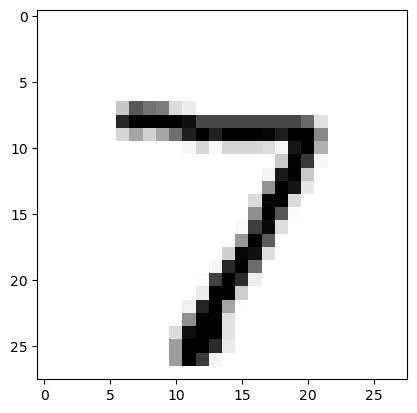

[6.4931583e-04 7.9497504e-06 9.8875844e-01 8.8381337e-04 8.0353579e-13
 5.0227111e-03 4.4846819e-03 7.2661070e-15 1.9303219e-04 4.1639171e-11]  =>  2


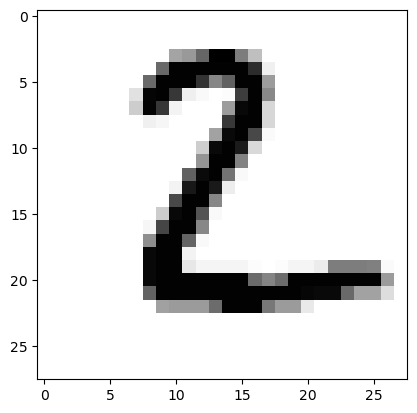

[6.6860157e-06 9.7667718e-01 1.1574075e-02 3.1512615e-03 1.5896028e-04
 7.7529484e-04 1.2131996e-03 1.6722287e-03 4.4120047e-03 3.5901633e-04]  =>  1


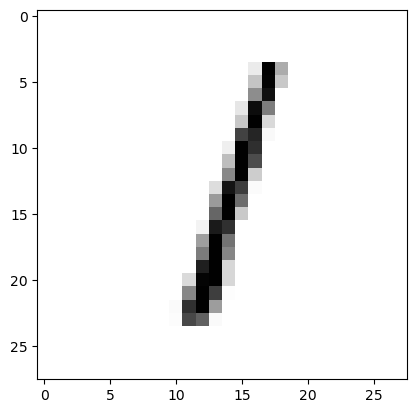

[9.9987233e-01 2.8667884e-11 3.0560961e-05 2.2467536e-06 1.2122314e-08
 4.2531421e-05 2.7607739e-05 6.6018129e-06 1.2292464e-05 5.8845390e-06]  =>  0


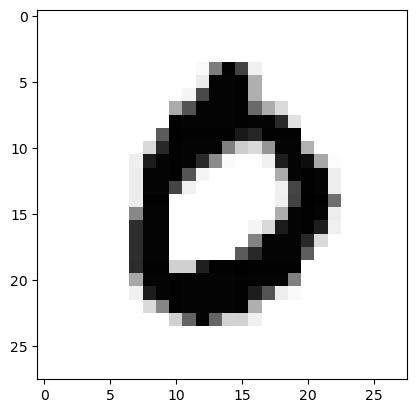

[5.1312853e-04 1.0750953e-06 2.2790122e-03 5.2006213e-05 9.6207756e-01
 1.2040693e-04 1.5172492e-03 2.7259733e-03 5.5735121e-03 2.5140075e-02]  =>  4


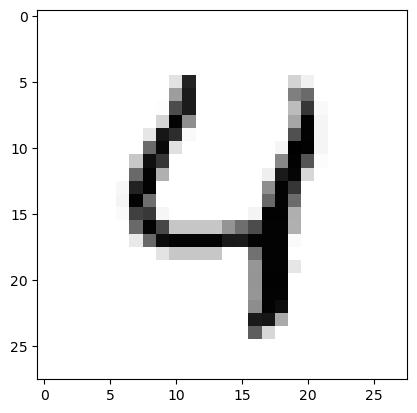

In [34]:
probs = model_lr.predict(test_x[:5])
preds = np.argmax(probs, axis=1)
for i in range(5):
    print(probs[i], " => ", preds[i])
    plt.imshow(test_x[i], cmap="Greys")
    plt.show()

In [39]:
model_lr.predict(test_x[18].reshape(1,28,28))

1/1 [==============================] - 0s 33ms/step


array([[1.6054511e-04, 3.0917043e-05, 8.4416412e-02, 7.6333910e-01,
        2.3091635e-04, 9.1665290e-02, 1.1684980e-02, 4.1131010e-05,
        4.8418641e-02, 1.2024725e-05]], dtype=float32)

In [40]:
model_lr.predict(test_x[18:19])

1/1 [==============================] - 0s 18ms/step


array([[1.6054511e-04, 3.0917043e-05, 8.4416412e-02, 7.6333910e-01,
        2.3091635e-04, 9.1665290e-02, 1.1684980e-02, 4.1131010e-05,
        4.8418641e-02, 1.2024725e-05]], dtype=float32)